# Data Processing

In [9]:
import json
import os
import pandas as pd
from pandas import json_normalize
import matplotlib.pyplot as plt
import os
import numpy as np
import neurokit2 as nk

In [10]:
import pandas as pd

def convert_to_dataframe(user_data):
    # Extract user details
    details = user_data["user_details"]
    name = details['name']
    
    # Create DataFrame for timestamp and feature signals
    df = pd.DataFrame({
        "timestamp": user_data["timestamp"],  # Assuming these timestamps are in milliseconds
        "ECG": user_data["ecg"],
        "GSR": user_data["gsr"],
        "PPG_red": user_data["ppg_red"],
        "PPG_ir": user_data["ppg_ir"],
        "PPG_green": user_data["ppg_green"]
    })
    
    # Convert timestamps from milliseconds to datetime
    time_data = pd.to_datetime(df['timestamp'], unit='ms')
    
    # Calculate the sampling frequency
    # Ensure timestamp is sorted or represents sequential data
    time_diffs = time_data.diff().dt.total_seconds().dropna()  # Calculate differences in seconds
    avg_sampling_interval = time_diffs.mean()  # Calculate average time difference in seconds
    sampling_frequency = round(1 / avg_sampling_interval) if avg_sampling_interval > 0 else None
    
    print(f"Sampling Freq: {sampling_frequency} Hz")
    
    # Append the calculated sampling frequency and user details as attributes
    df.attrs = {**details, "sampling_frequency": sampling_frequency}
    
    return name, df

In [11]:
FileNames = ["Alysonn_2024-03-07_17-58-45",
             "Jared_2024-03-07_18-54-03",
             "Thomas_2024-03-07_19-47-05",
             "Lia Llorca_2024-03-05_19-04-49",
             "William Powell_2024-03-04_18-23-11"]

# Dictionary to hold DataFrames for each file
dataframes = {}

# Base path assumes files are one directory up from the current script's directory
base_path = os.path.join(os.getcwd(), '..')

# Loop through each file in FileNames
for file_name in FileNames:
    json_file_path = os.path.join(base_path, f"Data/{file_name}.json")  # Construct file path
    normalized_path = os.path.normpath(json_file_path)  # Normalize the path

    try:
        with open(normalized_path, 'r') as file:
            data = json.load(file)
        print(f"JSON data successfully loaded from {file_name}.")
            
        # Convert dictionary to pandas DataFrame
        name, df = convert_to_dataframe(data)
        
        # Store the DataFrame in the dictionary
        dataframes[name] = df

    except Exception as e:
        print(f"Failed to load JSON data from {file_name}: {e}")
        


name = 'William Powell' 
my_data = dataframes[name]
SF = my_data.attrs['sampling_frequency']

print(my_data)



JSON data successfully loaded from Alysonn_2024-03-07_17-58-45.
Sampling Freq: 80 Hz
JSON data successfully loaded from Jared_2024-03-07_18-54-03.
Sampling Freq: 79 Hz
JSON data successfully loaded from Thomas_2024-03-07_19-47-05.
Sampling Freq: 79 Hz
JSON data successfully loaded from Lia Llorca_2024-03-05_19-04-49.
Sampling Freq: 132 Hz
JSON data successfully loaded from William Powell_2024-03-04_18-23-11.
Sampling Freq: 132 Hz
        timestamp      ECG      GSR    PPG_red     PPG_ir  PPG_green
0             9.0   163.25   354.75   18492.50   14428.25    3522.25
1            16.0   441.25   708.50   49293.00   41101.00    7033.75
2            24.0   582.25  1064.00   92367.50   80085.00   10552.75
3            32.0   919.25  1419.75  144671.25  131351.25   14068.75
4            39.0   983.50  1418.50  178487.75  176422.50   14060.75
...           ...      ...      ...        ...        ...        ...
199713  1509490.0  1615.25  1181.25  208962.50  232631.25   12013.75
199714  150949

In [12]:
FileTime = ["allyson-burba_subject-3_starttime-1709832653.3539333",
            "jared-joselowitz_subject-4_starttime-1709835964.3583503",
            "lia-llorca_subject-2_starttime-1709663763.6199603",
            "thomas-auguste_subject-5_starttime-1709839154.9869092",
            "will-powell_subject-0_starttime-1709575216.1554863"
            ]


for filetime in FileTime:
    json_file_path = os.path.join(base_path, f"Data/Time Data/{filetime}.json")  # Construct file path
    normalized_path = os.path.normpath(json_file_path)  # Normalize the path

    try:
        with open(normalized_path, 'r') as file:
            data_time = json.load(file)
        print(f"JSON data successfully loaded from {filetime}.")
            

        
        # # Store the DataFrame in the dictionary
        # dataframes[name] = df

    except Exception as e:
        print(f"Failed to load JSON data from {filetime}: {e}")

JSON data successfully loaded from allyson-burba_subject-3_starttime-1709832653.3539333.
JSON data successfully loaded from jared-joselowitz_subject-4_starttime-1709835964.3583503.
JSON data successfully loaded from lia-llorca_subject-2_starttime-1709663763.6199603.
JSON data successfully loaded from thomas-auguste_subject-5_starttime-1709839154.9869092.
JSON data successfully loaded from will-powell_subject-0_starttime-1709575216.1554863.


In [13]:
import pandas as pd


# def convert_to_time_dataframe(data):

name = data_time['subject_id']
# Assuming there's only one start time for the operation
start_time = data_time["video_loop_start_time"][0]

print(start_time)

# Assuming `time_recordings` is a list but in your case, it seems to have only one item
record = data_time["time_recordings"][0]  # Taking the first element for the example

# Prepare a dictionary to hold adjusted time data for DataFrame creation
adjusted_data = {key: [] for key in record}

# Iterate through each key, value pair in the record
for key, value_list in record.items():
    if "time" in key:  # Adjust only time-related fields
        adjusted_data[key] = [SF * (value - start_time) for value in value_list]
    else:
        adjusted_data[key] = value_list  # Non-time fields are copied as is

# Convert the adjusted data into a DataFrame
df = pd.DataFrame(adjusted_data)

print(df)

1709575216.1554863
    video_index video_name  baseline_duration  baseline_start_time  \
0             0     60.mp4          10.002266                  0.0   
1             1     11.mp4          10.002266                  0.0   
2             2     30.mp4          10.002266                  0.0   
3             3    120.mp4          10.002266                  0.0   
4             4     52.mp4          10.002266                  0.0   
5             5     56.mp4          10.002266                  0.0   
6             6     73.mp4          10.002266                  0.0   
7             7     14.mp4          10.002266                  0.0   
8             8     26.mp4          10.002266                  0.0   
9             9     12.mp4          10.002266                  0.0   
10           10     20.mp4          10.002266                  0.0   
11           11     22.mp4          10.002266                  0.0   
12           12     41.mp4          10.002266                  0.0   
1

## Events of Data

event_onsets (array or list) – A list of events onset.

event_durations (array or list) – A list of durations. If none is passed, will take the duration between each onset (i.e., will assume that events are consecutive).

event_labels (list) – A list containing unique event identifiers. If None, will use the event index number.

event_conditions (list) – An optional list containing, for each event, for example the trial category, group or experimental conditions.

In [14]:

video_start_time_list = df['video_start_time'].tolist()
video_start_end_list = df['video_end_time'].tolist()
video_name = df['video_name'].tolist()
video_duration = (df['video_duration'] * SF).tolist()

# # print(video_start_time_list)
# events = nk.events_create(event_onsets = video_start_time_list,
#                           event_durations = video_duration, 
#                           event_labels = video_name,
#                         ) 

# ECG

Text(0.5, 1.0, 'Cleaned ECG')

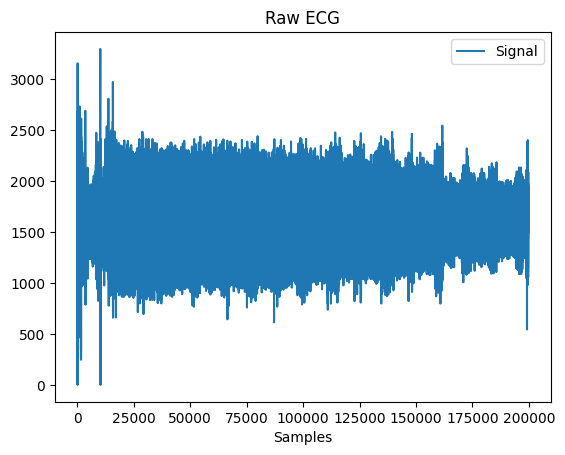

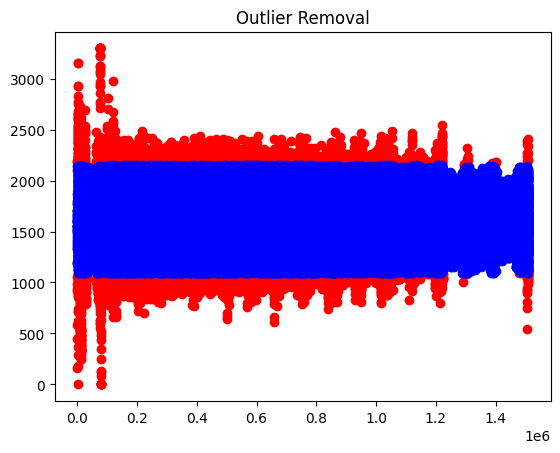

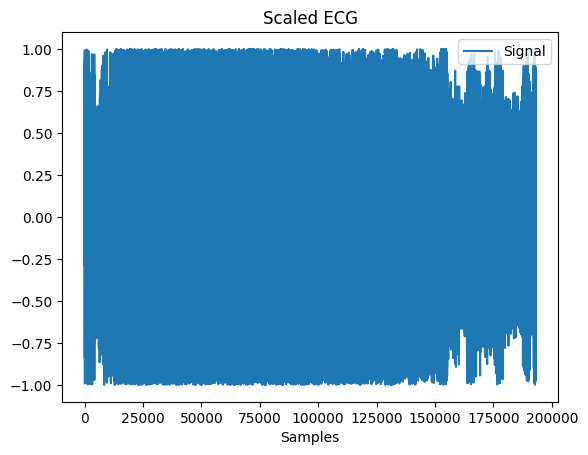

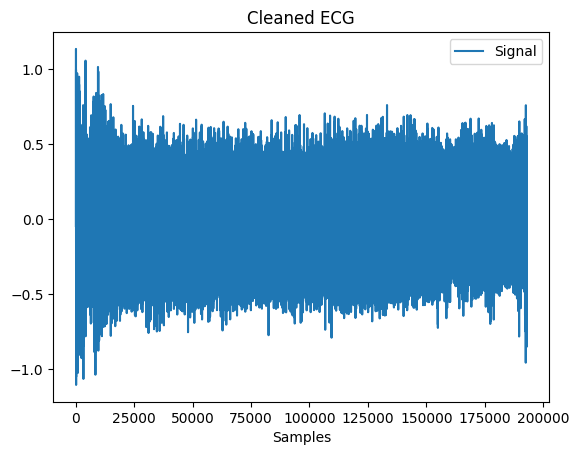

In [15]:
from sklearn.preprocessing import RobustScaler

# Calculate the mean and standard deviation
mean = my_data['ECG'].mean()
std_dev = my_data['ECG'].std()

remove_outlier = True
if remove_outlier:
    # Define your threshold for deviation from the mean
    threshold = 2

    # Filter out outliers
    outliers_mask = (my_data['ECG'] < mean - threshold * std_dev) | (my_data['ECG'] > mean + threshold * std_dev)

    outliers = my_data['ECG'][outliers_mask]

    filtered_ecg = my_data['ECG'][~outliers_mask]

    nk.signal_plot(my_data['ECG'])

    fig = plt.gcf()
    plt.title('Raw ECG')

    plt.figure()
    plt.scatter(my_data['timestamp'][outliers_mask], outliers, color = 'red')
    plt.scatter(my_data['timestamp'][~outliers_mask], filtered_ecg, color = 'blue')
    plt.title('Outlier Removal')
    # Reshape data for the scaler
    data_reshaped = filtered_ecg.values.reshape(-1, 1)
    
else:
    data_reshaped = my_data['ECG'].values.reshape(-1, 1)
    
# Initialize the RobustScaler
robust_scaler = RobustScaler()

# Fit and transform the data with RobustScaler
data_robust_scaled = robust_scaler.fit_transform(data_reshaped)

# Manually scale to [-1, 1] based on the robustly scaled data
data_scaled_to_range = np.interp(data_robust_scaled, (data_robust_scaled.min(), data_robust_scaled.max()), (-1, 1))

# Convert back to a pandas series, if needed
ecg_data = pd.Series(data_scaled_to_range.flatten())

nk.signal_plot(ecg_data)

fig = plt.gcf()
plt.title('Scaled ECG')

# Process ecg
ecg_signals, info = nk.ecg_process(ecg_data, sampling_rate = SF, method = 'neurokit')
nk.signal_plot(ecg_signals['ECG_Clean'])
fig = plt.gcf()
plt.title('Cleaned ECG') 



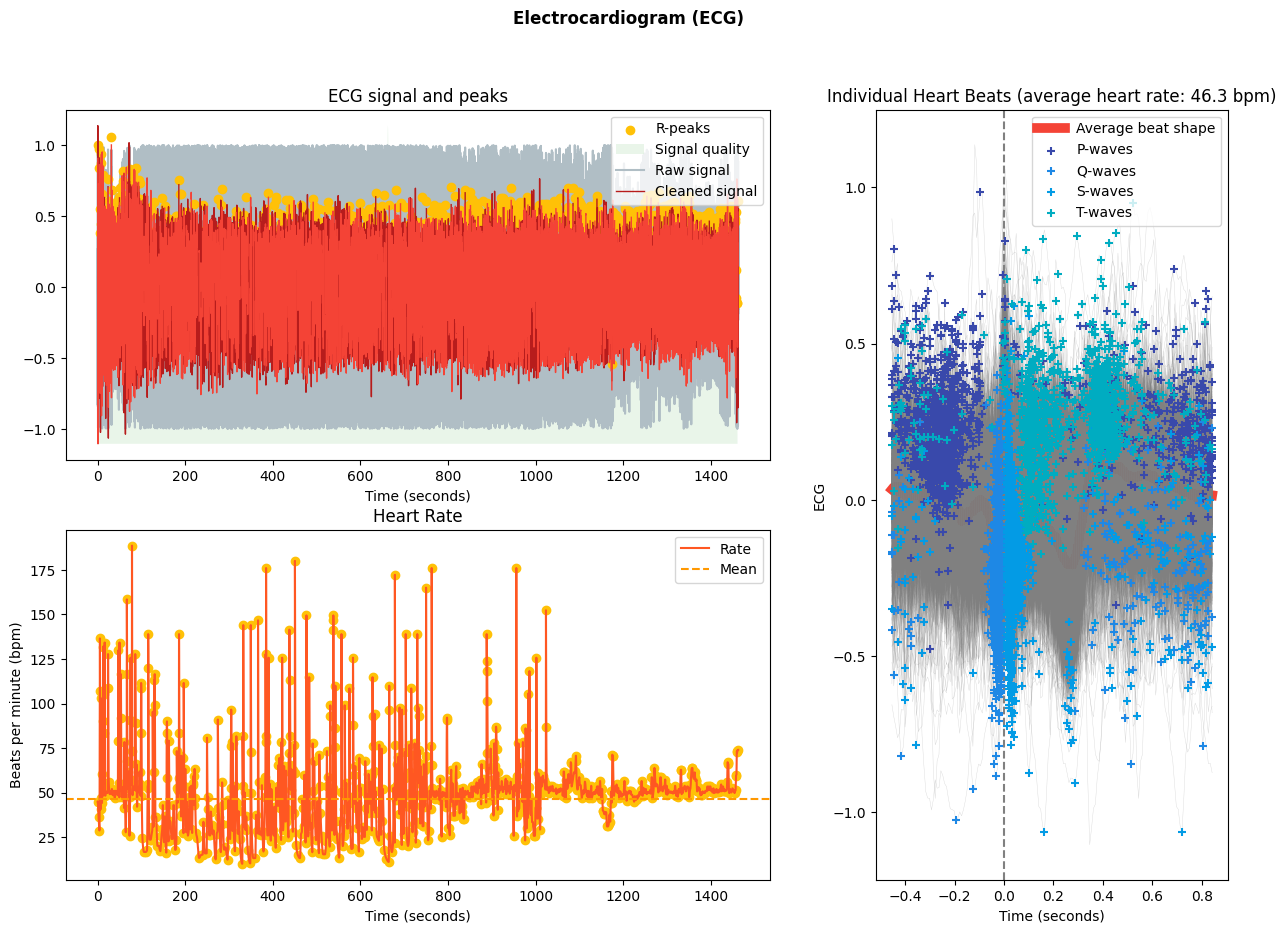

In [16]:
nk.ecg_plot(ecg_signals, info)
fig = plt.gcf()
fig.set_size_inches(15, 10, forward=True)
# fig.savefig("myfig.png")

These features include the RMSSD (square root of the mean of the sum of successive differences between adjacent RR intervals), MeanNN (mean of RR intervals) 

### Interval ECG

MeanNN: The mean of the RR intervals.

SDNN: The standard deviation of the RR intervals.

SDANN1, SDANN2, SDANN5: The standard deviation of average RR intervals extracted from n-minute segments of time series data (1, 2 and 5 by default). Note that these indices require a minimal duration of signal to be computed (3, 6 and 15 minutes respectively) and will be silently skipped if the data provided is too short.

SDNNI1, SDNNI2, SDNNI5: The mean of the standard deviations of RR intervals extracted from n-minute segments of time series data (1, 2 and 5 by default). Note that these indices require a minimal duration of signal to be computed (3, 6 and 15 minutes respectively) and will be silently skipped if the data provided is too short.

RMSSD: The square root of the mean of the squared successive differences between adjacent RR intervals. It is equivalent (although on another scale) to SD1, and therefore it is redundant to report correlations with both (Ciccone, 2017).

SDSD: The standard deviation of the successive differences between RR intervals.

CVNN: The standard deviation of the RR intervals (SDNN) divided by the mean of the RR intervals (MeanNN).

CVSD: The root mean square of successive differences (RMSSD) divided by the mean of the RR intervals (MeanNN).

MedianNN: The median of the RR intervals.

MadNN: The median absolute deviation of the RR intervals.

MCVNN: The median absolute deviation of the RR intervals (MadNN) divided by the median of the RR intervals (MedianNN).

IQRNN: The interquartile range (IQR) of the RR intervals.

SDRMSSD: SDNN / RMSSD, a time-domain equivalent for the low Frequency-to-High Frequency (LF/HF) Ratio (Sollers et al., 2007).

Prc20NN: The 20th percentile of the RR intervals (Han, 2017; Hovsepian, 2015).

Prc80NN: The 80th percentile of the RR intervals (Han, 2017; Hovsepian, 2015).

pNN50: The proportion of RR intervals greater than 50ms, out of the total number of RR intervals.

pNN20: The proportion of RR intervals greater than 20ms, out of the total number of RR intervals.

MinNN: The minimum of the RR intervals (Parent, 2019; Subramaniam, 2022).

MaxNN: The maximum of the RR intervals (Parent, 2019; Subramaniam, 2022).

TINN: A geometrical parameter of the HRV, or more specifically, the baseline width of the RR intervals distribution obtained by triangular interpolation, where the error of least squares determines the triangle. It is an approximation of the RR interval distribution.

HTI: The HRV triangular index, measuring the total number of RR intervals divided by the height of the RR intervals histogram.

In [17]:
print(my_data)

        timestamp      ECG      GSR    PPG_red     PPG_ir  PPG_green
0             9.0   163.25   354.75   18492.50   14428.25    3522.25
1            16.0   441.25   708.50   49293.00   41101.00    7033.75
2            24.0   582.25  1064.00   92367.50   80085.00   10552.75
3            32.0   919.25  1419.75  144671.25  131351.25   14068.75
4            39.0   983.50  1418.50  178487.75  176422.50   14060.75
...           ...      ...      ...        ...        ...        ...
199713  1509490.0  1615.25  1181.25  208962.50  232631.25   12013.75
199714  1509497.0  1685.75  1179.50  208951.00  232612.00   12002.75
199715  1509505.0  1832.00  1178.75  208936.00  232587.50   12001.75
199716  1509512.0  1497.25  1182.00  208933.25  232568.00   11987.00
199717  1509520.0  1835.50  1181.50  208927.50  232555.00   11971.25

[199718 rows x 6 columns]


In [20]:
# Creating epochs
video_start_time_list = df['video_start_time'].tolist()
video_start_end_list = df['video_end_time'].tolist()
video_name = df['video_name'].tolist()
video_duration = (df['video_duration'] * SF).tolist()

# epochs_create(data, events=None,
#               sampling_rate=1000, 
#               epochs_start=0,
#               epochs_end='from_events',
#               event_labels=None,
#               event_conditions=None,
#               baseline_correction=False)
print(video_name)

epochs = nk.epochs_create(ecg_signals, 
                            epochs_start = video_start_time_list,
                            epochs_end = video_start_end_list,
                            event_labels = video_name,
                            sampling_rate = SF, 
                            baseline_correction=False)

ECG_Features = nk.ecg_intervalrelated(epochs)
    

['60.mp4', '11.mp4', '30.mp4', '120.mp4', '52.mp4', '56.mp4', '73.mp4', '14.mp4', '26.mp4', '12.mp4', '20.mp4', '22.mp4', '41.mp4', '59.mp4', '62.mp4']


ValueError: NeuroKit error: events_find(): oops, it seems like the `event_labels` that you provided are not unique (all different). Please provide 0 distinct labels.

In [ ]:
# List of columns to be removed
columns_to_remove = ['HRV_SDANN1', 'HRV_SDNNI1', 'HRV_SDANN2', 'HRV_SDNNI2', 'HRV_SDANN5', 'HRV_SDNNI5','HRV_SDNNI5']

# Drop specified columns
ECG_Features = ECG_Features.drop(columns=columns_to_remove)

print(ECG_Features)


KeyError: "['HRV_SDANN1', 'HRV_SDNNI1', 'HRV_SDANN2', 'HRV_SDNNI2', 'HRV_SDANN5', 'HRV_SDNNI5', 'HRV_SDNNI5'] not found in axis"

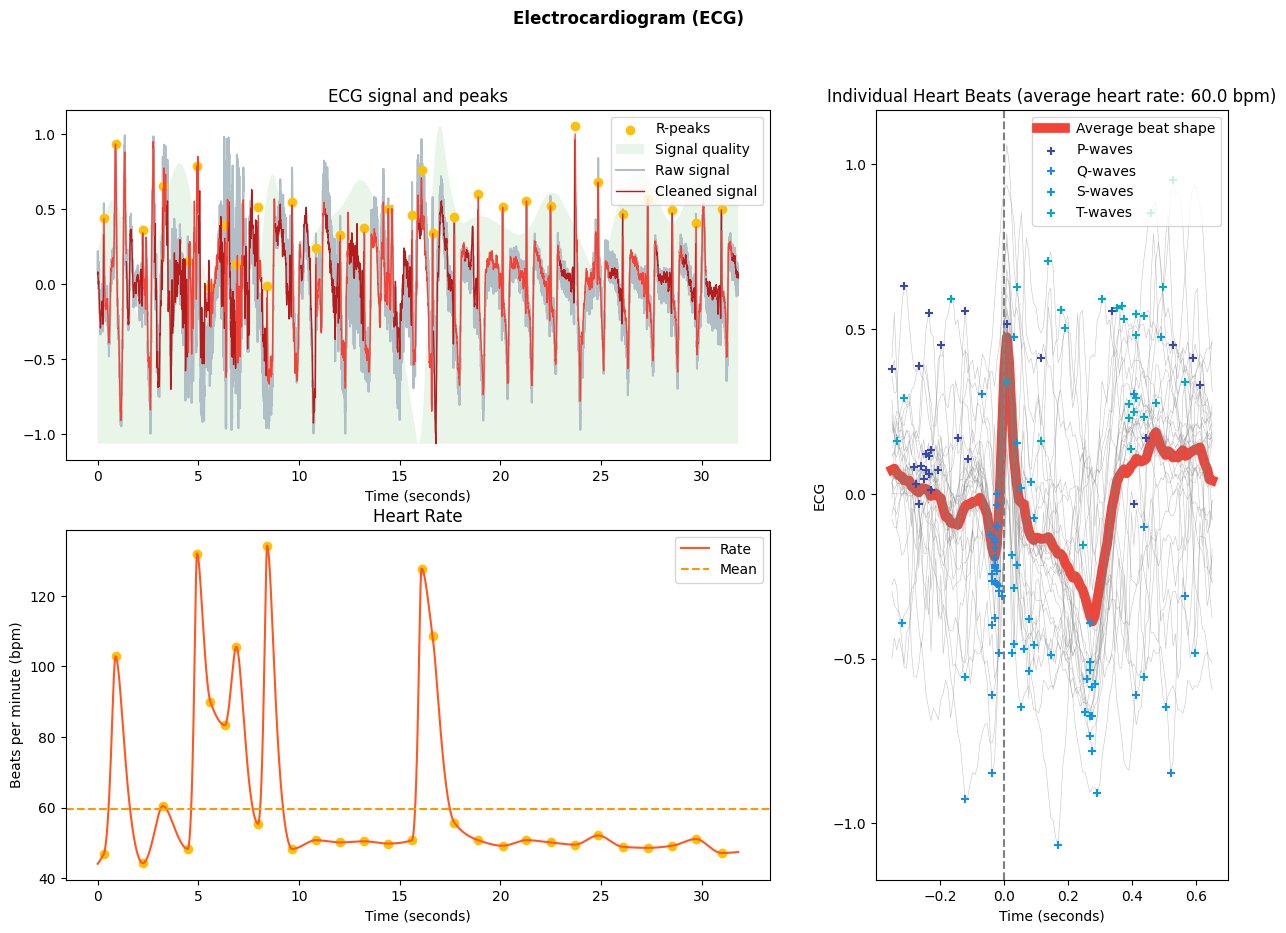

In [ ]:
nk.ecg_plot(ecg_signals[1000:5200], info)
fig = plt.gcf()
fig.set_size_inches(15, 10, forward=True)

### ECG Derived RSP Features

Returns: 

"RSP_Rate_Mean": the mean respiratory rate.

"RSP_Amplitude_Mean": the mean respiratory amplitude.

"RSP_RRV": the different respiratory rate variability metrices. See below.

"RSP_Phase_Duration_Inspiration": the average inspiratory duration.

"RSP_Phase_Duration_Expiration": the average expiratory duration.

"RSP_Phase_Duration_Ratio ": the inspiratory-to-expiratory time ratio (I/E).

#### RSP_RRV

"RRV_SDBB": the standard deviation of the breath-to-breath intervals.

"RRV_RMSSD": the root mean square of successive differences of the breath-to-breath intervals.

"RRV_SDSD": the standard deviation of the successive differences between adjacent breath-to-breath intervals.

"RRV_BBx": the number of successive interval differences that are greater than x seconds.

"RRV-pBBx": the proportion of breath-to-breath intervals that are greater than x seconds, out of the total number of intervals.

"RRV_VLF": spectral power density pertaining to very low frequency band (i.e., 0 to . 04 Hz) by default.

"RRV_LF": spectral power density pertaining to low frequency band (i.e., .04 to .15 Hz) by default.

"RRV_HF": spectral power density pertaining to high frequency band (i.e., .15 to .4 Hz) by default.

"RRV_LFHF": the ratio of low frequency power to high frequency power.

"RRV_LFn": the normalized low frequency, obtained by dividing the low frequency power by the total power.

"RRV_HFn": the normalized high frequency, obtained by dividing the low frequency power by total power.

"RRV_SD1": SD1 is a measure of the spread of breath-to-breath intervals on the Poincaré plot perpendicular to the line of identity. It is an index of short-term variability.

"RRV_SD2": SD2 is a measure of the spread of breath-to-breath intervals on the Poincaré plot along the line of identity. It is an index of long-term variability.

"RRV_SD2SD1": the ratio between short and long term fluctuations of the breath-to-breath intervals (SD2 divided by SD1).

"RRV_ApEn": the approximate entropy of RRV, calculated by entropy_approximate().

"RRV_SampEn": the sample entropy of RRV, calculated by entropy_sample().

"RRV_DFA_alpha1": the “short-term” fluctuation value generated from Detrended Fluctuation Analysis i.e. the root mean square deviation from the fitted trend of the breath-to-breath intervals. Will only be computed if mora than 160 breath cycles in the signal.

"RRV_DFA_alpha2": the long-term fluctuation value. Will only be computed if mora than 640 breath cycles in the signal.

In [ ]:
print(ecg_signals)

         ECG_Raw  ECG_Clean   ECG_Rate   ECG_Quality  ECG_R_Peaks  \
0      -0.834828  -0.044578  44.987161  1.110223e-16            0   
1      -0.812176   0.026336  44.987161  1.110223e-16            0   
2      -0.538462   0.089472  44.987161  1.110223e-16            0   
3      -0.798018   0.109439  44.987161  1.110223e-16            0   
4      -0.414818   0.202805  44.987161  1.110223e-16            0   
...          ...        ...        ...           ...          ...   
193020 -0.010854  -0.231421  74.018692  0.000000e+00            0   
193021  0.122227  -0.226681  74.018692  0.000000e+00            0   
193022  0.398301  -0.206330  74.018692  0.000000e+00            0   
193023 -0.233601  -0.285600  74.018692  0.000000e+00            0   
193024  0.404908   0.044121  74.018692  0.000000e+00            0   

        ECG_P_Peaks  ECG_P_Onsets  ECG_P_Offsets  ECG_Q_Peaks  ECG_R_Onsets  \
0                 0             0              0            0             0   
1            

             RSP_Raw     RSP_Clean  RSP_Amplitude   RSP_Rate   RSP_RVT  \
0       3.159083e+00  2.385073e+00      78.204855   8.294317  1.136971   
1       3.145033e+00  2.373117e+00      78.204855   8.294317  1.138939   
2       3.130782e+00  2.360973e+00      78.204855   8.294317  1.141073   
3       3.116330e+00  2.348655e+00      78.204855   8.294317  1.143371   
4       3.101678e+00  2.336176e+00      78.204855   8.294317  1.145834   
...              ...           ...            ...        ...       ...   
199713 -9.160291e-10  9.414959e-08      35.957650  18.812352  0.708385   
199714 -7.816542e-10  8.438522e-08      35.957650  18.812352  0.708494   
199715 -6.608387e-10  7.494784e-08      35.957650  18.812352  0.708580   
199716 -5.529248e-10  6.588613e-08      35.957650  18.812352  0.708642   
199717 -4.572432e-10  5.724978e-08      35.957650  18.812352  0.708680   

        RSP_Phase  RSP_Phase_Completion  RSP_Symmetry_PeakTrough  \
0             NaN                   0.0    

c:\Users\lauri\.virtualenvs\AML-dynaMix-AryBn7L8\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\lauri\.virtualenvs\AML-dynaMix-AryBn7L8\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\lauri\.virtualenvs\AML-dynaMix-AryBn7L8\Lib\site-packages\numpy\lib\nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\lauri\.virtualenvs\AML-dynaMix-AryBn7L8\Lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\lauri\.virtualenvs\AML-dynaMix-AryBn7L8\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\U

ValueError: ('NeuroKit error: complexity_embedding(): dimension * delay should be lower than', ' the length of the signal.')

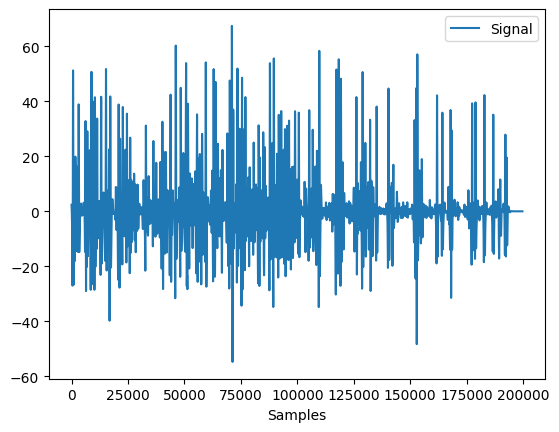

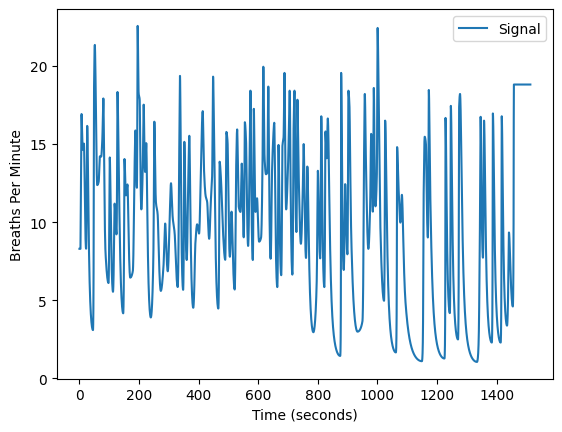

In [ ]:
# # Extract peaks
rpeaks, info = nk.ecg_peaks(ecg_signals, sampling_rate=SF)

# Compute rate
ecg_rate = nk.ecg_rate(rpeaks, sampling_rate=SF, desired_length=len(my_data["ECG"]))

edr = nk.ecg_rsp(ecg_rate, sampling_rate=SF)

rsp_data, rsp_info = nk.rsp_process(edr, 
            sampling_rate=SF)

# Visual comparison
nk.signal_plot(rsp_data['RSP_Clean'])

# Visualize
nk.signal_plot(rsp_data['RSP_Rate'], sampling_rate=SF)

plt.ylabel('Breaths Per Minute')

print(rsp_data)
print(events)

# Creating epochs
epochs = nk.epochs_create(rsp_data, 
                            events = events, 
                            sampling_rate = SF,
                            epochs_start =  
                            baseline_correction=False)


# epochs_create(data, events=None,
#               sampling_rate=1000, epochs_start=0, epochs_end='from_events',
#               event_labels=None, event_conditions=None, baseline_correction=False)

RSP_Features = nk.rsp_intervalrelated(epochs, sampling_rate=SF)

print(RSP_Features)


# PPG

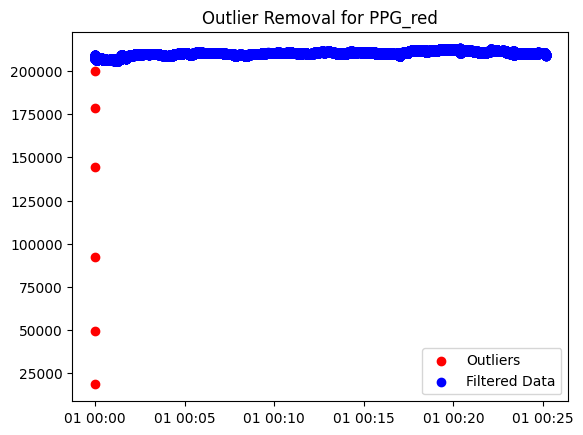

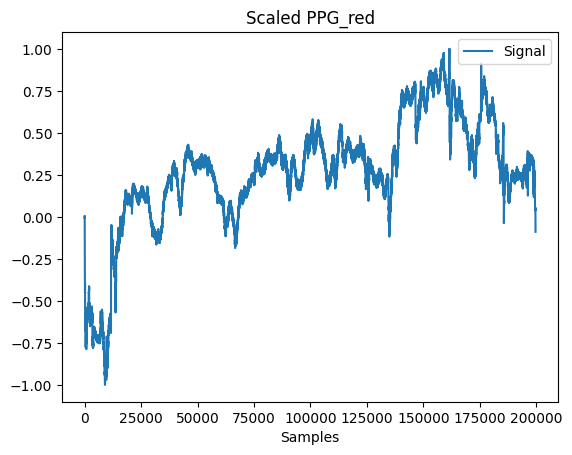

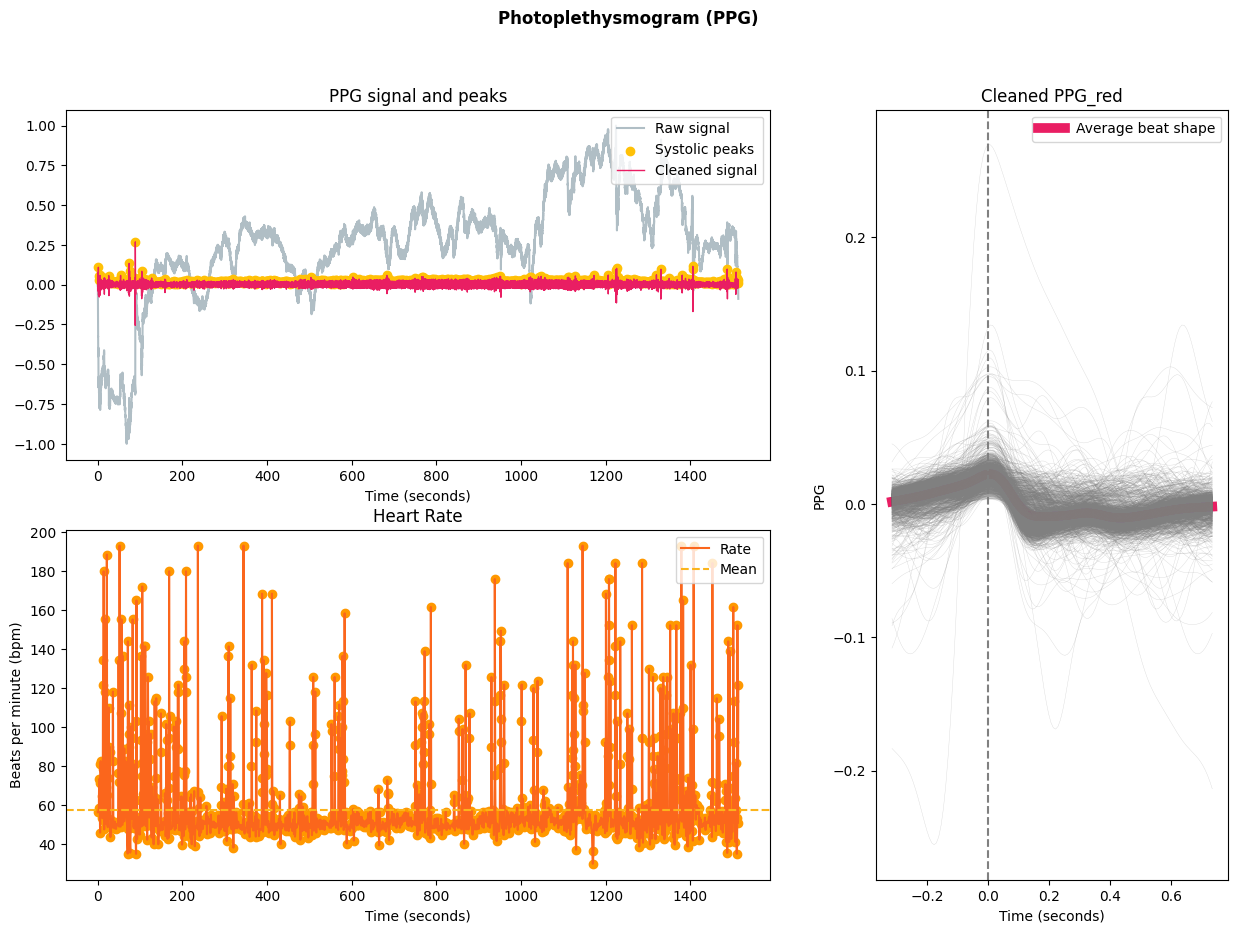

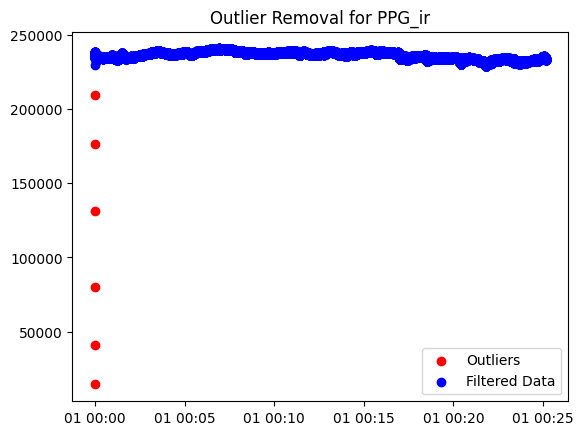

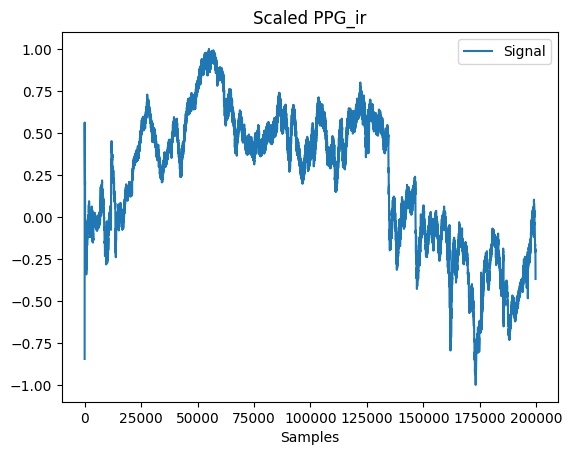

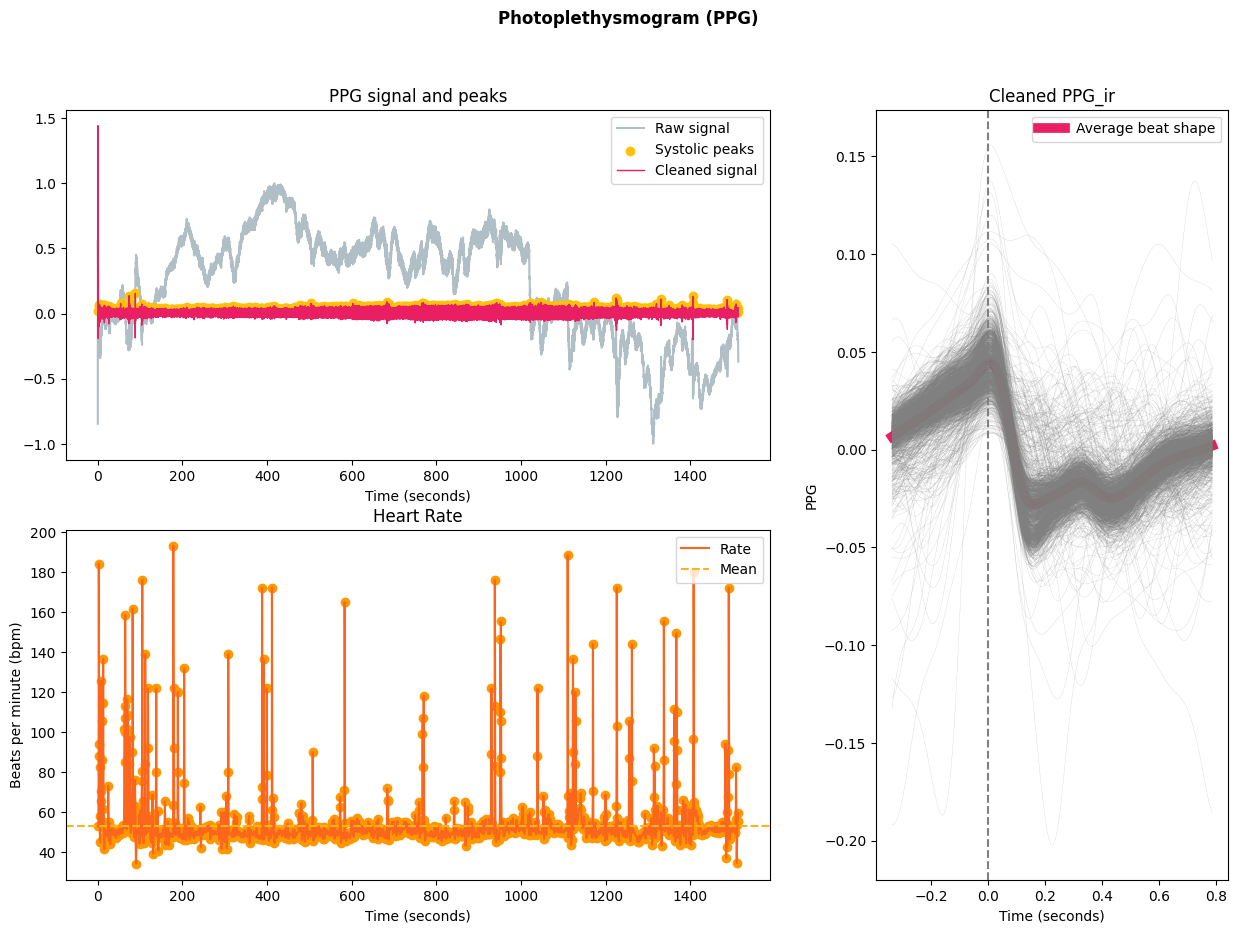

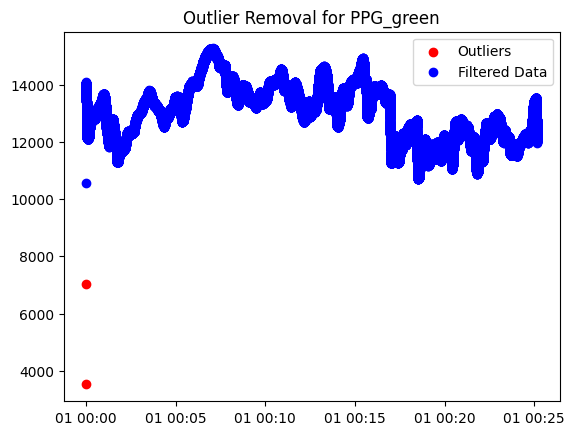

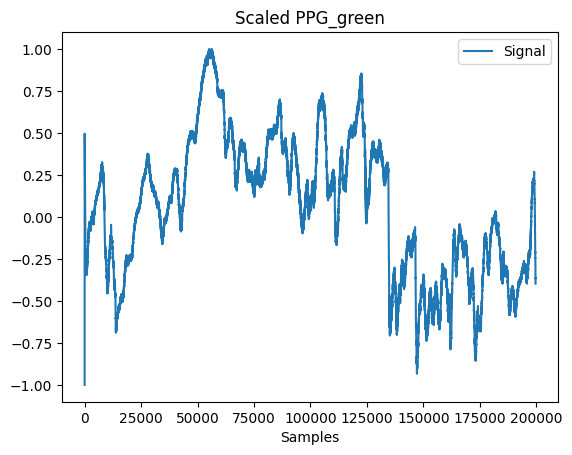

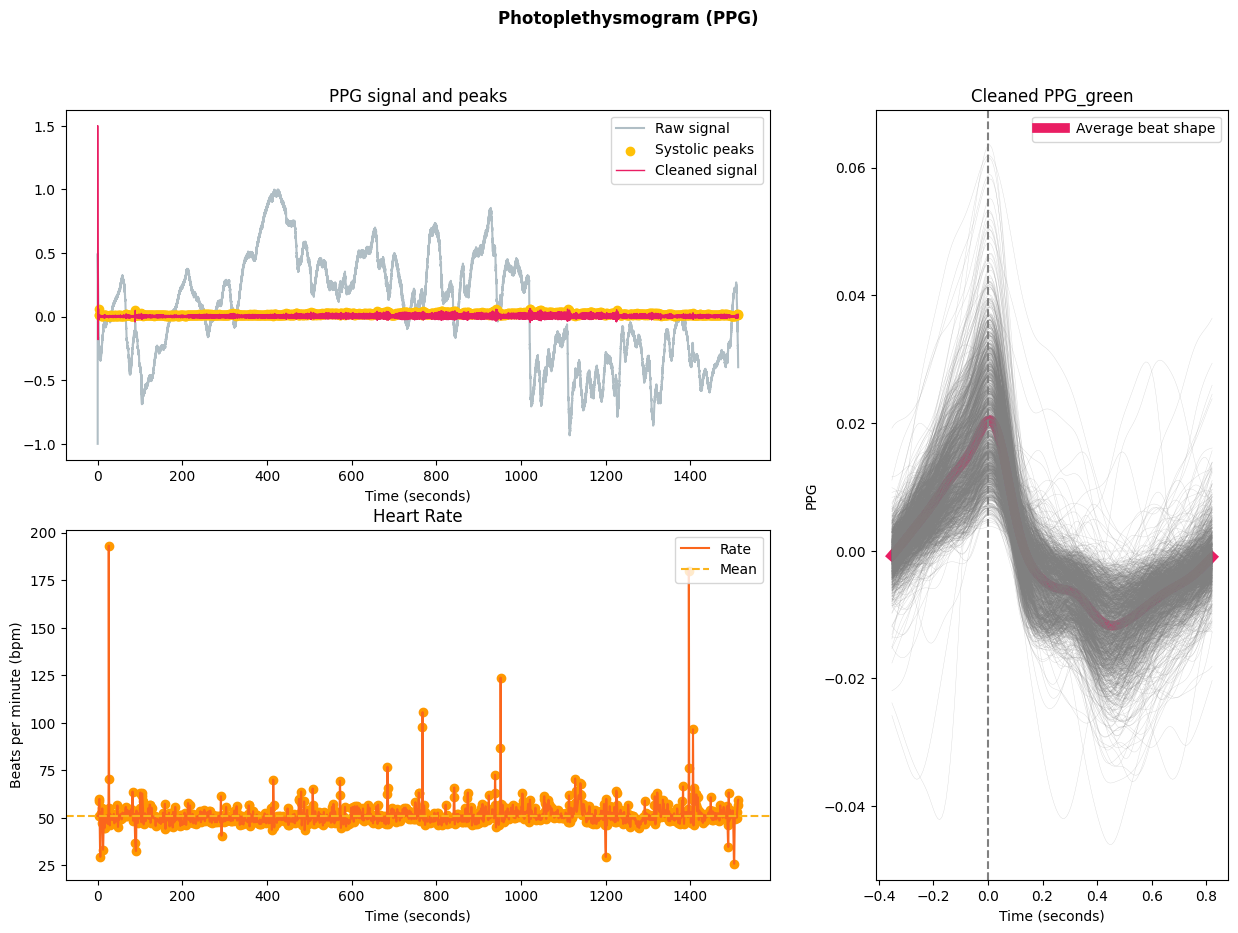

In [ ]:
from sklearn.preprocessing import RobustScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import neurokit2 as nk

# Columns to process
columns_to_process = ["PPG_red", "PPG_ir", "PPG_green"]

# Define your threshold for deviation from the mean
threshold = 5

ppg_data = {}
info = {}

for column in columns_to_process:
    
    data = my_data[column]
    # Calculate the mean and standard deviation for each column
    mean = data.mean()
    std_dev = data.std()

    # Filter out outliers
    outliers_mask = (data < mean - threshold * std_dev) | (data > mean + threshold * std_dev)
    outliers = data[outliers_mask]
    filtered_ppg = data[~outliers_mask]

    # Plotting
    plt.figure()
    plt.scatter(my_data['timestamp'][outliers_mask], outliers, color='red', label='Outliers')
    plt.scatter(my_data['timestamp'][~outliers_mask], filtered_ppg, color='blue', label='Filtered Data')
    plt.title(f'Outlier Removal for {column}')
    plt.legend()

    # Reshape data for the scaler
    data_reshaped = filtered_ppg.values.reshape(-1, 1)

    # Initialize the RobustScaler
    robust_scaler = RobustScaler()

    # Fit and transform the data with RobustScaler
    data_robust_scaled = robust_scaler.fit_transform(data_reshaped)

    # Manually scale to [-1, 1] based on the robustly scaled data
    data_scaled_to_range = np.interp(data_robust_scaled, (data_robust_scaled.min(), data_robust_scaled.max()), (-1, 1))

    # Convert back to a pandas series
    ppg_data_scaled = pd.Series(data_scaled_to_range.flatten(), name=column + "_scaled")

    # Append the scaled data to my_data DataFrame or handle it as needed
    my_data[column + "_scaled"] = ppg_data_scaled

    # Plotting scaled data
    nk.signal_plot(ppg_data_scaled)  # This line assumes you want to plot with neurokit2, adjust as necessary
    plt.title(f'Scaled {column}')
    
    # Process the PPG data with NeuroKit2
    processed_data, processed_info = nk.ppg_process(ppg_data_scaled, sampling_rate=SF, method='elgendi')
    
    # Store the processed data and info in dictionaries
    ppg_data[column] = processed_data
    info[column] = processed_info

    # Plot the cleaned PPG data
    nk.ppg_plot(processed_data, processed_info)
    plt.gcf().set_size_inches(15, 10, forward=True)
    plt.title(f'Cleaned {column}')
    
plt.show()

In [ ]:
columns_to_process = ["PPG_red", "PPG_ir", "PPG_green"]

PPG_Features = {}

for column in columns_to_process:
    # Creating epochs
    epochs = nk.epochs_create(ppg_data[column], 
                                events = events, 
                                sampling_rate = SF, 
                                baseline_correction=False)

                              
    PPG_Features[column] = nk.ppg_intervalrelated(epochs)


c:\Users\lauri\.virtualenvs\AML-dynaMix-AryBn7L8\Lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:474: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(
c:\Users\lauri\.virtualenvs\AML-dynaMix-AryBn7L8\Lib\site-packages\neurokit2\complexity\entropy_multiscale.py:349: RuntimeWarning: invalid value encountered in scalar divide
  mse = np.trapz(mse) / len(mse)
c:\Users\lauri\.virtualenvs\AML-dynaMix-AryBn7L8\Lib\site-packages\neurokit2\complexity\entropy_multiscale.py:349: RuntimeWarning: invalid value encountered in scalar divide
  mse = np.trapz(mse) / len(mse)
c:\Users\lauri\.virtualenvs\AML-dynaMix-AryBn7L8\Lib\site-packages\neurokit2\complexity\entropy_multiscale.py:349: RuntimeWarning: invalid value encountered in scalar divide
  mse = np.trapz(mse) / len(mse)
c:

In [ ]:
print(PPG_Features)

{'PPG_red':            Label  PPG_Rate_Mean  HRV_MeanNN   HRV_SDNN  HRV_SDANN1  \
Video 1  Video 1      74.695107  110.692308  41.598817         NaN   
Video 2  Video 2      67.397219  120.478261  40.732910         NaN   

         HRV_SDNNI1  HRV_SDANN2  HRV_SDNNI2  HRV_SDANN5  HRV_SDNNI5  ...  \
Video 1         NaN         NaN         NaN         NaN         NaN  ...   
Video 2         NaN         NaN         NaN         NaN         NaN  ...   

         HRV_SampEn  HRV_ShanEn  HRV_FuzzyEn  HRV_MSEn  HRV_CMSEn  HRV_RCMSEn  \
Video 1         inf    4.623517     1.997969       NaN        NaN         NaN   
Video 2         inf    4.436605     2.015017       NaN        NaN         NaN   

           HRV_CD   HRV_HFD  HRV_KFD   HRV_LZC  
Video 1  1.913802  2.043871  9.73088  1.446289  
Video 2  1.852676  2.037540  3.67686  1.376736  

[2 rows x 84 columns], 'PPG_ir':            Label  PPG_Rate_Mean  HRV_MeanNN   HRV_SDNN  HRV_SDANN1  \
Video 1  Video 1      58.952131  137.000000  41.90107

# GSR

### EDA

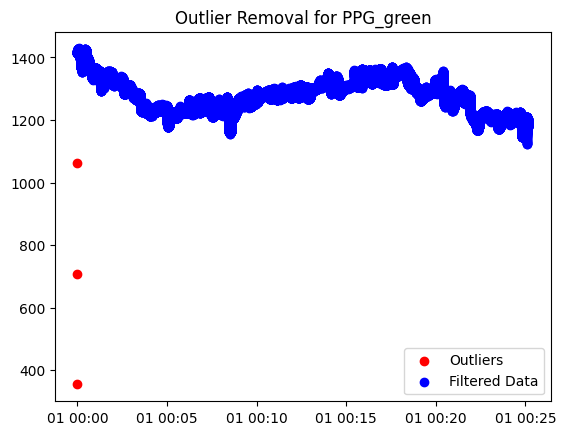

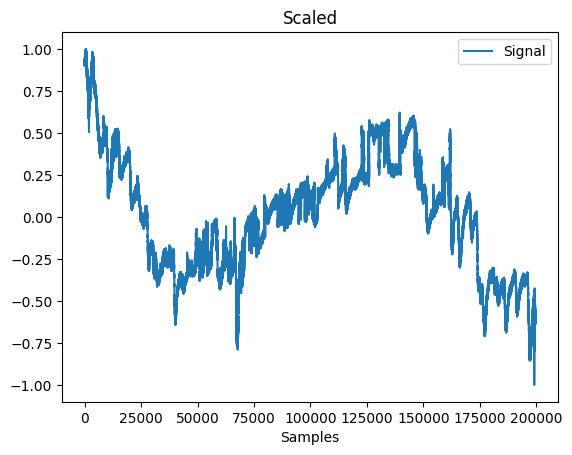

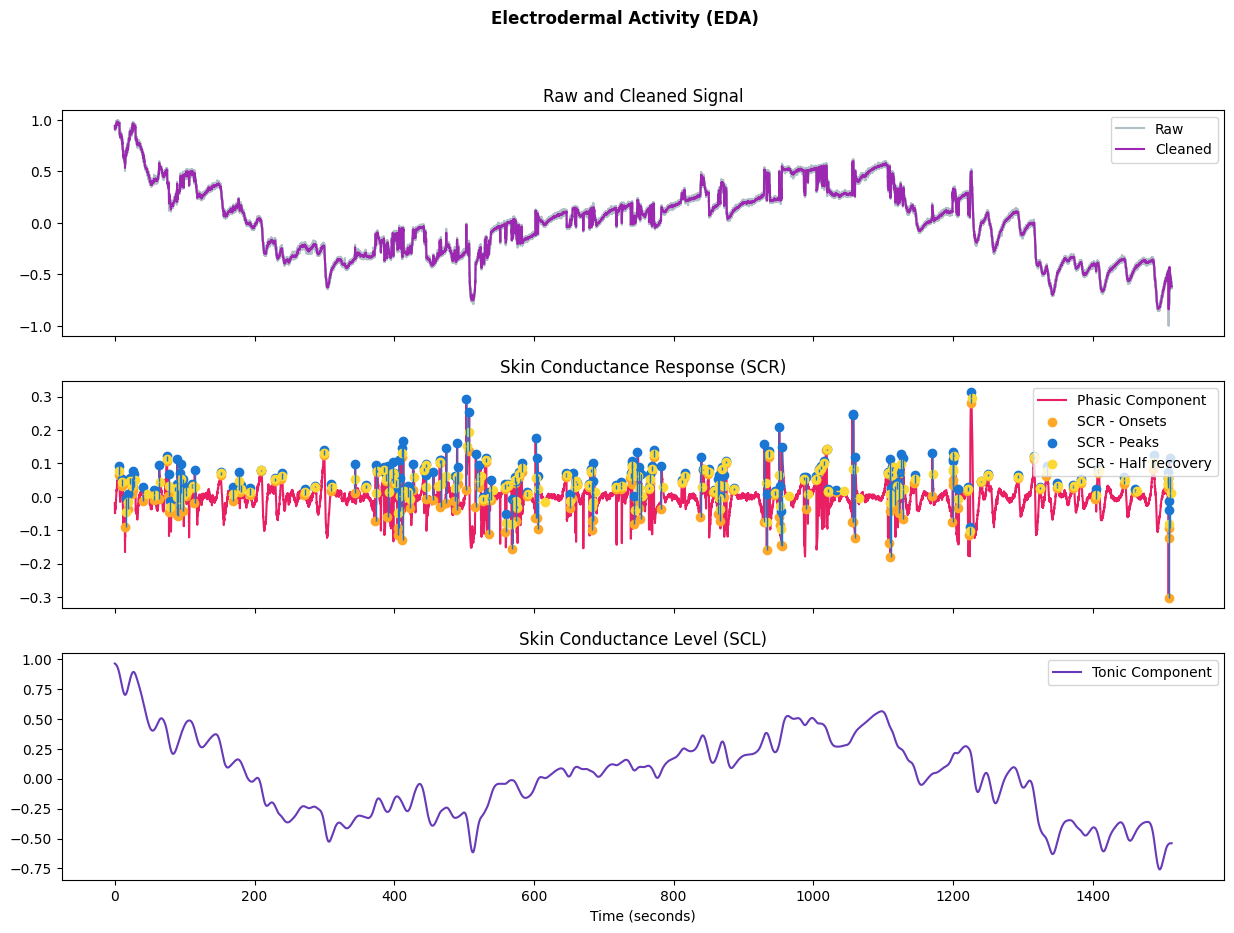

In [ ]:
from sklearn.preprocessing import RobustScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import neurokit2 as nk

# Columns to process
columns_to_process = ["PPG_red", "PPG_ir", "PPG_green"]

# Define your threshold for deviation from the mean
threshold = 3


data = my_data['GSR']
# Calculate the mean and standard deviation for each column
mean = data.mean()
std_dev = data.std()

# Filter out outliers
outliers_mask = (data < mean - threshold * std_dev) | (data > mean + threshold * std_dev)
outliers = data[outliers_mask]
filtered_GSR = data[~outliers_mask]

# Plotting
plt.figure()
plt.scatter(my_data['timestamp'][outliers_mask], outliers, color='red', label='Outliers')
plt.scatter(my_data['timestamp'][~outliers_mask], filtered_GSR, color='blue', label='Filtered Data')
plt.title(f'Outlier Removal for {column}')
plt.legend()

# Reshape data for the scaler
data_reshaped = filtered_GSR.values.reshape(-1, 1)

# Initialize the RobustScaler
robust_scaler = RobustScaler()

# Fit and transform the data with RobustScaler
data_robust_scaled = robust_scaler.fit_transform(data_reshaped)

# Manually scale to [-1, 1] based on the robustly scaled data
data_scaled_to_range = np.interp(data_robust_scaled, (data_robust_scaled.min(), data_robust_scaled.max()), (-1, 1))

# Convert back to a pandas series
gsr_data_scaled = pd.Series(data_scaled_to_range.flatten())

# Plotting scaled data
nk.signal_plot(gsr_data_scaled)  # This line assumes you want to plot with neurokit2, adjust as necessary
plt.title('Scaled')

# Process the PPG data with NeuroKit2
eda_data, eda_info = nk.eda_process(gsr_data_scaled, sampling_rate=SF)


# Plot the cleaned PPG data
nk.eda_plot(eda_data, eda_info)
plt.gcf().set_size_inches(15, 10, forward=True)
    
plt.show()

In [ ]:
# Creating epochs
epochs = nk.epochs_create(eda_data, 
                            events = events, 
                            sampling_rate = SF, 
                            baseline_correction=False)

                            
EDA_features = nk.eda_intervalrelated(epochs)


In [ ]:
print(EDA_features)

           Label  SCR_Peaks_N  SCR_Peaks_Amplitude_Mean  EDA_Tonic_SD  \
Video 1  Video 1            7                  0.045078      0.068452   
Video 2  Video 2            2                  0.065052      0.037929   

         EDA_Sympathetic  EDA_SympatheticN  EDA_Autocorrelation  
Video 1              NaN               NaN                  NaN  
Video 2              NaN               NaN                  NaN  


# Save Feature Data

In [ ]:
print(PPG_Features)

{'PPG_red':            Label  PPG_Rate_Mean  HRV_MeanNN   HRV_SDNN  HRV_SDANN1  \
Video 1  Video 1      74.695107  110.692308  41.598817         NaN   
Video 2  Video 2      67.397219  120.478261  40.732910         NaN   

         HRV_SDNNI1  HRV_SDANN2  HRV_SDNNI2  HRV_SDANN5  HRV_SDNNI5  ...  \
Video 1         NaN         NaN         NaN         NaN         NaN  ...   
Video 2         NaN         NaN         NaN         NaN         NaN  ...   

         HRV_SampEn  HRV_ShanEn  HRV_FuzzyEn  HRV_MSEn  HRV_CMSEn  HRV_RCMSEn  \
Video 1         inf    4.623517     1.997969       NaN        NaN         NaN   
Video 2         inf    4.436605     2.015017       NaN        NaN         NaN   

           HRV_CD   HRV_HFD  HRV_KFD   HRV_LZC  
Video 1  1.913802  2.043871  9.73088  1.446289  
Video 2  1.852676  2.037540  3.67686  1.376736  

[2 rows x 84 columns], 'PPG_ir':            Label  PPG_Rate_Mean  HRV_MeanNN   HRV_SDNN  HRV_SDANN1  \
Video 1  Video 1      58.952131  137.000000  41.90107

In [ ]:
import json

# Function to convert NumPy types to Python native types for JSON serialization
def convert_np_types(obj):
    if isinstance(obj, np.ndarray):
        return obj.tolist()
    elif isinstance(obj, np.generic):
        return obj.item()
    raise TypeError(f"Object of type '{obj.__class__.__name__}' is not JSON serializable")


# Combine your DataFrames into a dictionary with unique labels
dfs = {
    "ECG Features": ECG_Features,
    "RSP Features": RSP_Features,
    "PPG IR Features": PPG_Features['PPG_ir'],
    "PPG Red Features": PPG_Features['PPG_red'],
    "PPG Green Features": PPG_Features['PPG_green'],
    "EDA Features": EDA_features
}

# Convert each DataFrame into a JSON string and store it back in the dictionary
for label, df in dfs.items():
    # Convert DataFrame to a JSON-friendly structure (e.g., records) then to a string
    dfs[label] = df.to_dict(orient="records")

# Serialize the dictionary to a JSON string
json_str = json.dumps(dfs, indent=4, default=convert_np_types)

# To save the JSON string to a file
with open(f'Features/{name}_Features.json', 'w') as f:
    f.write(json_str)
